In [4]:
# Importar Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
# Mapeamento do caminho e arquivo

path = 'C:\\Users\\FIC\Documents\\Fabiana Python\\003 - Arquivos\\Machine Learning\\'
file = 'protetor_solar.csv'

# Atribuir o arquivo a um dataframe
protetorsolar = pd.read_csv(path + file)


In [29]:

protetorsolar.head()

,temperatura,qtde
0,24.349104,572.672047
1,26.168859,658.600456
2,5.307507,242.509855
3,17.997015,441.002944
4,30.965087,702.623614


In [30]:
#### Obter informmações do dataframe

protetorsolar.describe()

,temperatura,qtde
count,94.000000,94.000000
mean,23.315863,547.331444
std,7.716093,168.781871
min,4.865874,188.151331
25%,18.519180,441.530609
50%,22.440388,528.451889
75%,28.525229,653.029300
max,41.766589,969.291630


In [31]:
#### Obter informmações do dataframe
protetorsolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperatura  94 non-null     float64
 1   qtde         94 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


#### Passo 03 - Visualizar os dados do Dataset

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

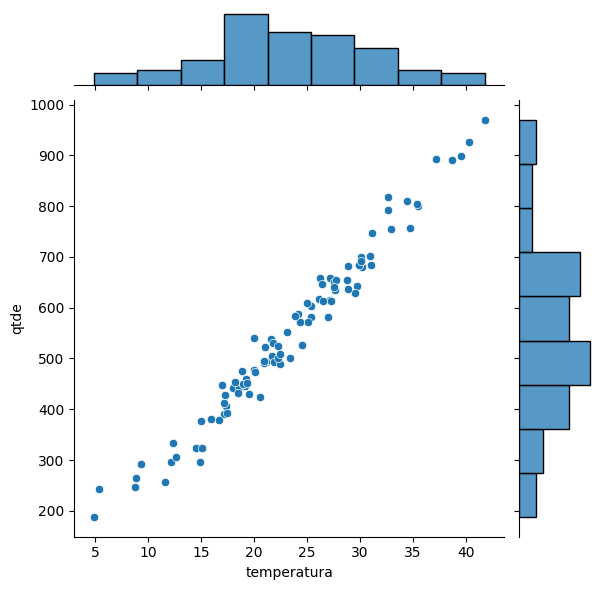

In [33]:
### Gráfico de dispersão e histograma 
sns.jointplot(x = 'temperatura',y = 'qtde', data= protetorsolar)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\L

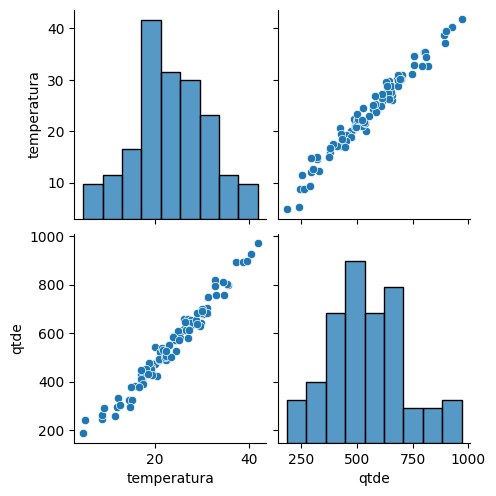

In [34]:
### Pairplot
sns.pairplot(protetorsolar)


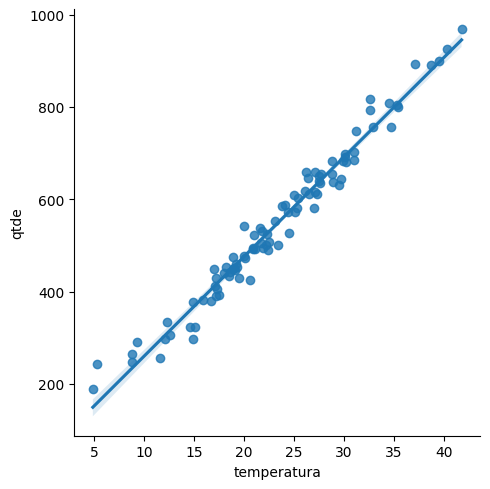

In [35]:
#### Gráfico de dispersão com linha média

sns.lmplot(
           x= 'temperatura', 
           y= 'qtde', 
           data= protetorsolar
           )

In [36]:
#### Passo 04 - Dividir o dataset para criar as bases de treino Colunas em duas variaveis (x,y)

x = protetorsolar[['temperatura']] # duas chaves para criar uma lista
y = protetorsolar['qtde']

In [37]:
#### Passo 05 - Importar a biblioteca Scikit Learn e dividir a base em treino e teste,  sendo que o tamanho do teste será de 25%

# Importar o comando rain_test_split para dividir o dataframe
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [39]:
X_train.shape

(70, 1)

In [40]:
y_test.shape

(24,)

In [42]:
### Importar o algoritimo LinearRegression da biblioteca Scikitlaern

from sklearn.linear_model import LinearRegression

In [43]:
# Este comando irá gerar a linha de tendência
regressor = LinearRegression(fit_intercept= True)
regressor.fit(X_train, y_train)

LinearRegression()

In [44]:
# Este comando irá gerar a linha de tendência
# E calcular os coeficientes linear e angular

print('Coeficiente angular (m):', regressor.coef_)
print('Coeficiente linear (b):', regressor.intercept_)


Coeficiente angular (m): [21.44632851]
Coeficiente linear (b): 49.56079909741413


In [45]:
#### Passo 06 - Executar o teste
y_previsao = regressor.predict(X_test)

y_previsao

array([502.70296816, 644.08390802, 634.63945623, 667.85328333,
       669.36380486, 237.34493802, 459.47847638, 694.77765933,
       368.38413785, 435.530691  , 478.83875419, 560.51791108,
       500.49984109, 497.80139198, 514.51499297, 593.87799528,
       618.53658641, 423.90992948, 896.97289759, 592.86965004,
       361.63087644, 793.27757616, 566.70891324, 467.65146543])

In [46]:
y_test

7     493.226636
25    654.894955
79    612.241963
73    682.808566
57    636.298374
30    246.787161
21    445.772400
77    691.855484
72    296.906532
3     441.002944
12    477.315188
86    584.399945
26    521.775445
51    491.230603
16    505.743867
27    603.324631
63    612.243721
60    391.715299
64    898.805423
74    581.262016
9     323.944672
50    756.962562
28    588.527551
67    429.435702
Name: qtde, dtype: float64

Text(0.5, 1.0, 'Quantodade gerada vs. Temperatura (Vendas protetor solar)')

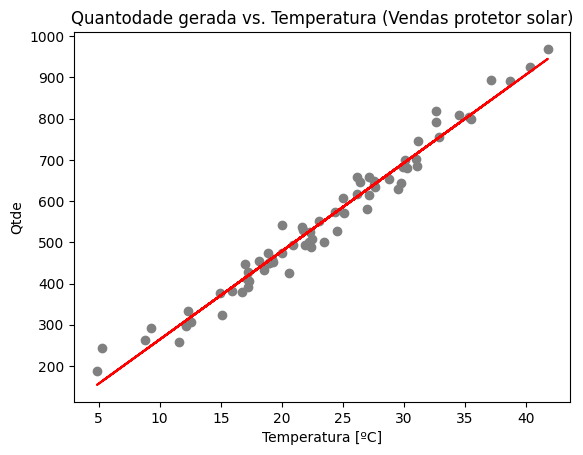

In [48]:
#### Plotando os resultados
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Qtde')
plt.xlabel('Temperatura [ºC]')
plt.title('Quantodade gerada vs. Temperatura (Vendas protetor solar)')